# GCM Filters Basic Case Exploration

In [1]:
import gcm_filters
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xrft
import numpy.polynomial.chebyshev as cheb

from gcm_filters import FilterShape, GridType

### Create an array of random numbers that are in (0,1)

In [2]:
ny, nx = (128, 256)
nt = 10
data = np.random.rand(nt, ny, nx)
da = xr.DataArray(data, dims=['time', 'y', 'x'])
da

<xarray.DataArray (time: 10, y: 128, x: 256)>
array([[[0.02031111, 0.60538234, 0.07462582, ..., 0.90829662,
         0.7498678 , 0.34594542],
        [0.23341364, 0.24513507, 0.25973512, ..., 0.88190497,
         0.91430193, 0.55266135],
        [0.19564066, 0.4679174 , 0.80840225, ..., 0.50754092,
         0.64827176, 0.21790388],
        ...,
        [0.56058532, 0.69432226, 0.74497567, ..., 0.40823574,
         0.24745166, 0.12505613],
        [0.07056068, 0.96193981, 0.05555052, ..., 0.44202401,
         0.71209127, 0.56505031],
        [0.81640874, 0.64723358, 0.77559671, ..., 0.13787305,
         0.1056031 , 0.04172277]],

       [[0.80370893, 0.64607666, 0.34039715, ..., 0.51410405,
         0.46119916, 0.06981094],
        [0.91274868, 0.07309124, 0.68678008, ..., 0.98556686,
         0.80054927, 0.90700608],
        [0.6880418 , 0.26099957, 0.83590372, ..., 0.65279001,
         0.58566464, 0.39994109],
...
        [0.84104383, 0.66962757, 0.58138578, ..., 0.00871486,
         0.3601259 , 0.02663802],
        [0.96224322, 0.30418092, 0.39290418, ..., 0.38620682,
         0.89412551, 0.0067572 ],
        [0.35520675, 0.89712664, 0.10376109, ..., 0.57968213,
         0.58348968, 0.77055002]],

       [[0.32711478, 0.56787184, 0.52603545, ..., 0.020223  ,
         0.45528682, 0.16111268],
        [0.93514665, 0.49387189, 0.84021433, ..., 0.68211348,
         0.84964743, 0.19434199],
        [0.77301189, 0.97755873, 0.95057632, ..., 0.68101704,
         0.59718442, 0.691562  ],
        ...,
        [0.22258719, 0.22500085, 0.0935163 , ..., 0.82792505,
         0.91019256, 0.06166332],
        [0.31771878, 0.45896234, 0.20897743, ..., 0.5707571 ,
         0.61165925, 0.03210705],
        [0.17136353, 0.47288124, 0.52639442, ..., 0.75836665,
         0.74050281, 0.68220592]]])
Dimensions without coordinates: time, y, x

### Plot unfiltered data

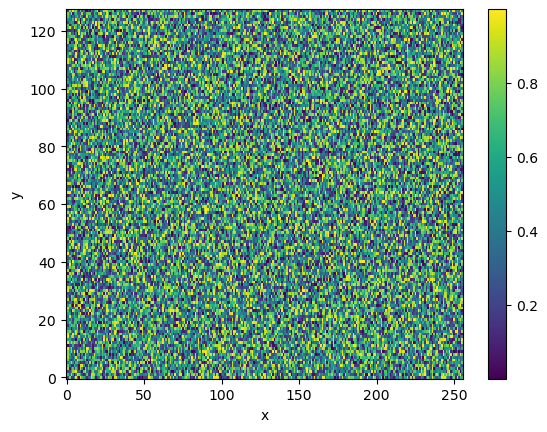

In [3]:
da.isel(time=0).plot()

### Create filter

In [3]:
filter = gcm_filters.Filter(
    filter_scale=4,
    dx_min=1,
    filter_shape=gcm_filters.FilterShape.TAPER,
    grid_type=gcm_filters.GridType.REGULAR
)
    
filter

Filter(filter_scale=4, dx_min=1, filter_shape=<FilterShape.TAPER: 2>, transition_width=3.141592653589793, ndim=2, n_steps=16, grid_type=<GridType.REGULAR: 1>)

### Apply filter

In [4]:
da_filtered = filter.apply(da, dims=['y', 'x'])
da_filtered

<xarray.DataArray (time: 10, y: 128, x: 256)>
array([[[0.40271711, 0.42483495, 0.4567918 , ..., 0.52598223,
         0.47034237, 0.42054977],
        [0.41423471, 0.41581049, 0.4375993 , ..., 0.54963149,
         0.5102124 , 0.45367106],
        [0.48993075, 0.49293263, 0.49959642, ..., 0.51936131,
         0.52549381, 0.50770229],
        ...,
        [0.46966259, 0.53913363, 0.57480196, ..., 0.38790119,
         0.36289473, 0.3985212 ],
        [0.45959942, 0.5298792 , 0.56392573, ..., 0.39840863,
         0.36748106, 0.39378795],
        [0.43047333, 0.48190287, 0.51664866, ..., 0.45865453,
         0.41241051, 0.40168204]],

       [[0.54475573, 0.51962883, 0.4918046 , ..., 0.58884607,
         0.57627691, 0.56272692],
        [0.56728159, 0.55102322, 0.53438   , ..., 0.62159657,
         0.59955925, 0.58138876],
        [0.55378646, 0.54767171, 0.54752738, ..., 0.62893371,
         0.5953818 , 0.56793741],
...
        [0.47191369, 0.52952794, 0.5797108 , ..., 0.43742311,
         0.40996699, 0.42555752],
        [0.52049235, 0.55960497, 0.58647828, ..., 0.48665373,
         0.46733303, 0.48345803],
        [0.53654988, 0.53382623, 0.52512053, ..., 0.54269407,
         0.53329731, 0.53436866]],

       [[0.4912663 , 0.51409143, 0.52581215, ..., 0.46565003,
         0.48117544, 0.48242781],
        [0.55770899, 0.58436135, 0.58034573, ..., 0.49201844,
         0.51663467, 0.53281082],
        [0.56377204, 0.59327825, 0.59506513, ..., 0.5130127 ,
         0.52902943, 0.53926677],
        ...,
        [0.3870397 , 0.35923911, 0.36827511, ..., 0.52870333,
         0.5013503 , 0.44591466],
        [0.36111199, 0.34994206, 0.37812542, ..., 0.49455245,
         0.46812186, 0.41246969],
        [0.40538873, 0.4150075 , 0.4445307 , ..., 0.46473367,
         0.457742  , 0.4278169 ]]])
Dimensions without coordinates: time, y, x

### Plot filtered data

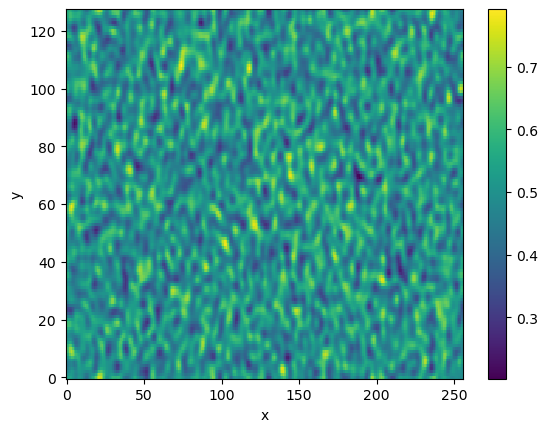

In [15]:
da_filtered.isel(time=0).plot()

### Plot the power spectra for the filtered and unfiltered case

/srv/conda/envs/notebook/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


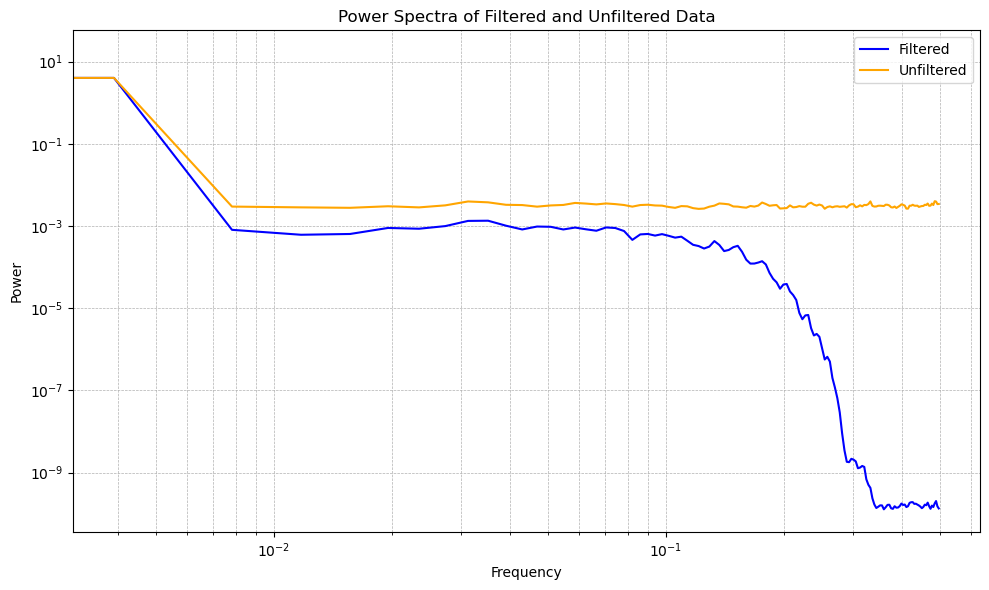

In [5]:
da_filtered_mean = da_filtered.mean(dim='time')
da_mean = da.mean(dim='time')

# Compute power spectrum for mean prediction and target
ps_filtered = xrft.power_spectrum(da_filtered_mean, dim='x', window=True).mean(dim='y')
ps_unfiltered = xrft.power_spectrum(da_mean, dim='x', window=True).mean(dim='y')

# Plot power spectra
plt.figure(figsize=(10, 6))
plt.plot(ps_filtered.freq_x, ps_filtered, label='Filtered', color='blue')
plt.plot(ps_unfiltered.freq_x, ps_unfiltered, label='Unfiltered', color='orange')

# Configure the plot
plt.title("Power Spectra of Filtered and Unfiltered Data")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(loc='best')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()


### Find wavenumber cutoff for filter

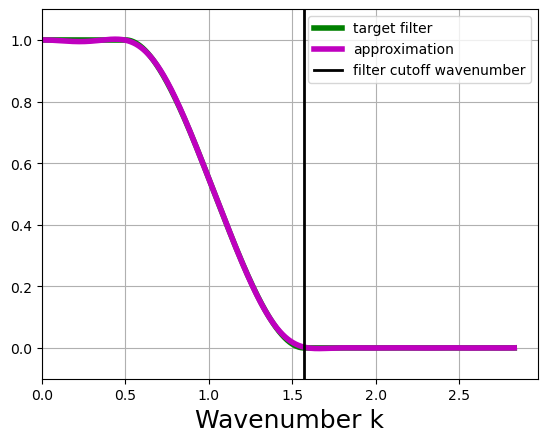

In [6]:
filter.plot_shape()

We try to recreate the filter kernel below. The steps are outlined.

filter.filter_spec.s_max: This is a parameter related to the maximum scale of the filter. It’s used in constructing the target filter function. s_max typically determines the largest spatial scale that the filter targets, and it plays a role in shaping the wavenumber.

filter.filter_spec.p: This contains the Chebyshev coefficients (p) that describe the approximation of the target filter (the purple line). These coefficients are used to compute the actual filter in spectral space.

filter.filter_scale: This defines the filter scale, which typically sets the characteristic length scale of the filter (i.e., where the cutoff of the filter happens). It’s an important parameter for determining the resolution and behavior of the filter in spatial or spectral space.

k = np.sqrt(s_max * (x + 1) / 2):
- x + 1: This shifts the values of x from the range [-1, 1] to [0, 2], which maps the normalized spectral space to a physical spectral scale.

- (x + 1) / 2: Normalizes the range so that it spans from 0 to 1. This is done because the function that we are using expects the values to be scaled in this way.

- s_max * (x + 1) / 2: This scales the range by s_max, adjusting the "effective" maximum scale of the wavenumber, as determined by the filter’s parameters.

- np.sqrt(...): Finally, taking the square root of the result produces the wavenumber k, which has units of 1/degrees.

- So, k is the wavenumber in spectral space, representing the spatial frequency.

approx_vals = cheb.chebval(x, p):

- cheb.chebval(x, p) is a function that computes the values of a Chebyshev polynomial at the points given by x using the coefficients stored in p.

- The coefficients p were obtained earlier from filter.filter_spec.p, which represent the Chebyshev approximation to the filter’s shape. This gives you the purple line (the approximation curve) in spectral space.

- The result approx_vals is a 1D array containing the filter response (approximation) evaluated at the points x.

cutoff_k = 2 * np.pi / filter_scale:

- 2 * np.pi / filter_scale: This computes the cutoff wavenumber. The cutoff is the wavenumber where the filter’s response falls off (the transition between filtered and unfiltered frequencies).

- filter_scale is a parameter that represents the characteristic length scale of the filter. The larger the filter_scale, the lower the cutoff wavenumber. Essentially, cutoff_k marks the threshold beyond which frequencies are attenuated by the filter.

In [7]:
# Extract from your filter
s_max = filter.filter_spec.s_max        # max scale of filter
p = filter.filter_spec.p                # chebyshev coefficients used to calculate target filter (green line)
filter_scale = filter.filter_scale      # filter scale

# Generate domain and compute
x = np.linspace(-1, 1, 256)
k = np.sqrt(s_max * (x + 1) / 2)        # wavenumber array in spectral space
approx_vals = cheb.chebval(x, p)        # chebyshev polynomial calculation @ x

# Black line = cutoff wavenumber
cutoff_k = 2 * np.pi / filter_scale     # cutoff filter

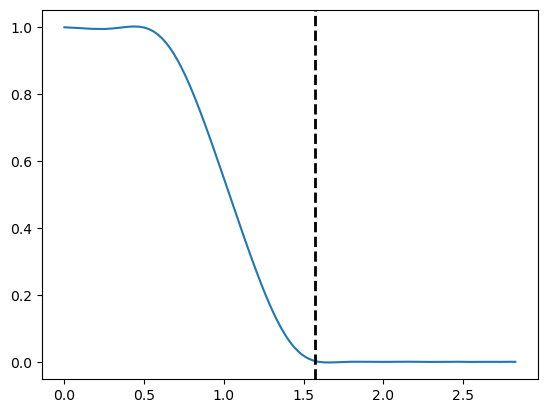

In [8]:
plt.plot(k, approx_vals)
plt.axvline(x=cutoff_k, color='k', linestyle='--', linewidth=2, label='cutoff')

### Power spectra for wavenumber k

/srv/conda/envs/notebook/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


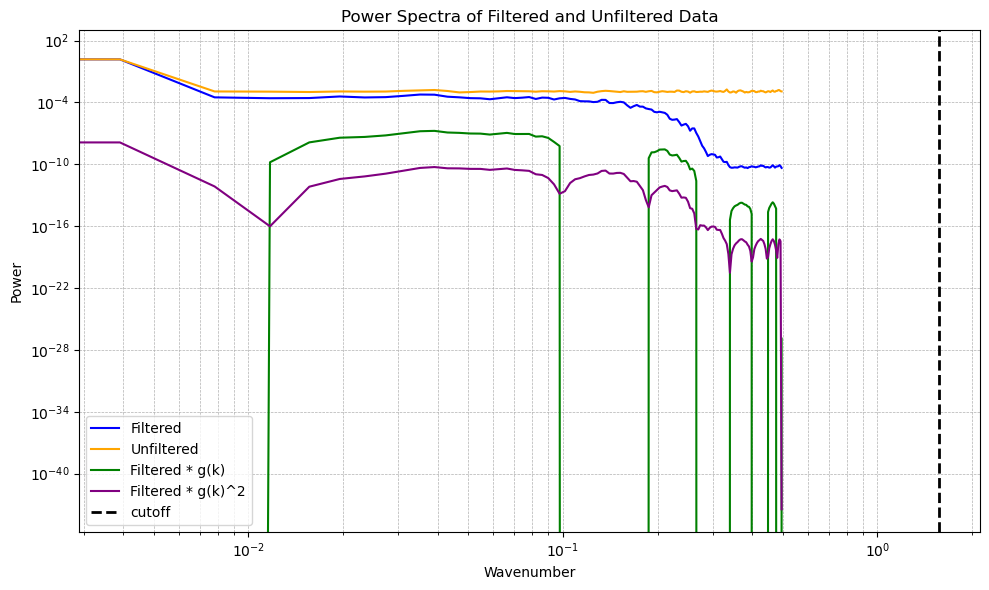

In [9]:
da_filtered_mean = da_filtered.mean(dim='time')
da_mean = da.mean(dim='time')

# Compute power spectrum for mean prediction and target
ps_filtered = xrft.power_spectrum(da_filtered_mean, dim=['x', 'y'], window=True).mean(dim='freq_y')
ps_unfiltered = xrft.power_spectrum(da_mean, dim=['x', 'y'], window=True).mean(dim='freq_y')

# Plot power spectra
plt.figure(figsize=(10, 6))
ps_filtered.plot(label='Filtered', color='blue')
ps_unfiltered.plot(label='Unfiltered', color='orange')
(ps_filtered*approx_vals).plot(label='Filtered * g(k)', color='green')
(ps_filtered*(approx_vals**2)).plot(label='Filtered * g(k)^2',color='purple')

plt.axvline(x=cutoff_k, color='k', linestyle='--', linewidth=2, label='cutoff')

# Configure the plot
plt.title("Power Spectra of Filtered and Unfiltered Data")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavenumber')
plt.ylabel('Power')
plt.legend(loc='best')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()


Note that our filter cutoff line does not seem to correspond to where the filtered power spectra drops off. This indicates that our frequency-wavenumber relation $f = \frac{k}{2\pi}$ is likely incorrect. 

However, we still see that the expected power spectra dropoff for the filtered case is occuring. We just need to change our frequency to wavenumber conversion.

# CM2.6 Data Exploration

### Pre-process data

In [22]:
from xgcm import Grid
import pop_tools
import gcsfs
import fsspec as fs
import numpy as np
import xesmf as xe
import xarray as xr
import random
import matplotlib.pyplot as plt
import warnings
from xgcm import Grid
import importlib
import preprocessing
import gcm_filters
import xrft

warnings.filterwarnings("ignore")

importlib.reload(preprocessing)
from preprocessing import preprocess_data
from gcm_filtering_modified import filter_inputs_dataset
from gcm_filtering_modified import filter_inputs

In [2]:
ds_merged = preprocess_data()
ds_merged

Load Data
Interpolating ocean velocities
Modify units
Load Data
Align in time
Interpolating ocean velocities
Regrid Atmospheric Data
Modify units
Mask nans
Calculate relative wind


<xarray.Dataset>
Dimensions:       (time: 7305, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
    dxt           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dyt           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolat_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolon_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    ht            (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    kmt           (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    wet           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    area_t        (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [3]:
ds_in = ds_merged
ds_in = ds_in.drop(['area_t', 'dxt', 'dyt', 'geolat_t', 'geolon_t', 'ht', 'kmt', 'wet'])
ds_in

<xarray.Dataset>
Dimensions:       (time: 7305, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

### Filter data and create filter

In [5]:
print("Filtering model")
ds_out_50, filter_cm26 = filter_inputs_dataset(ds_in, ['yt_ocean', 'xt_ocean'], filter_scale=50, filter_type='gaussian')
ds_out_50

Filtering model


<xarray.Dataset>
Dimensions:       (time: 7305, xt_ocean: 3600, yt_ocean: 2700)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    filter_scale:    50
    filter_type:     gaussian
    applied_filter:  Filter(filter_scale=50, dx_min=1, filter_shape=<FilterSh...

### Power spectra plotted against frequency

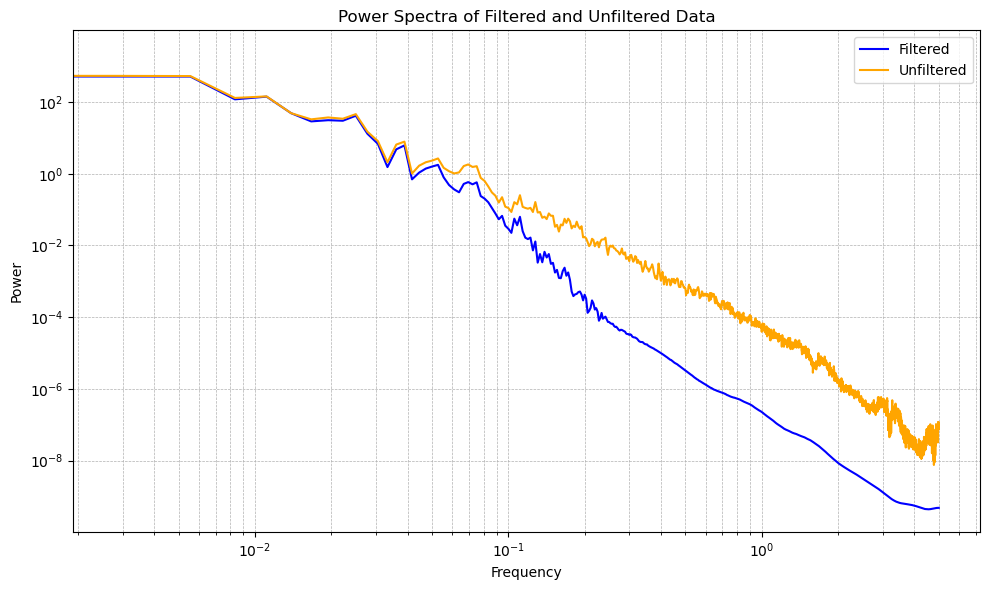

In [12]:
ds_in_snapshot = ds_in["u_relative"][0] #choose first time point
ds_out_50_snapshot = ds_out_50["u_relative"][0] #choose first time point

# Compute power spectrum for mean prediction and target
ps_unfiltered = xrft.power_spectrum(ds_in_snapshot, dim='xt_ocean', window=True).mean(dim='yt_ocean')
ps_filtered = xrft.power_spectrum(ds_out_50_snapshot, dim='xt_ocean', window=True).mean(dim='yt_ocean')

# Plot power spectra
plt.figure(figsize=(10, 6))
plt.plot(ps_filtered.freq_xt_ocean, ps_filtered, label='Filtered', color='blue')
plt.plot(ps_unfiltered.freq_xt_ocean, ps_unfiltered, label='Unfiltered', color='orange')

# Configure the plot
plt.title("Power Spectra of Filtered and Unfiltered Data")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(loc='best')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()


### Plot filter cutoff

In [6]:
filter_cm26

Filter(filter_scale=50, dx_min=1, filter_shape=<FilterShape.GAUSSIAN: 1>, transition_width=3.141592653589793, ndim=2, n_steps=56, grid_type=<GridType.REGULAR_WITH_LAND: 3>)

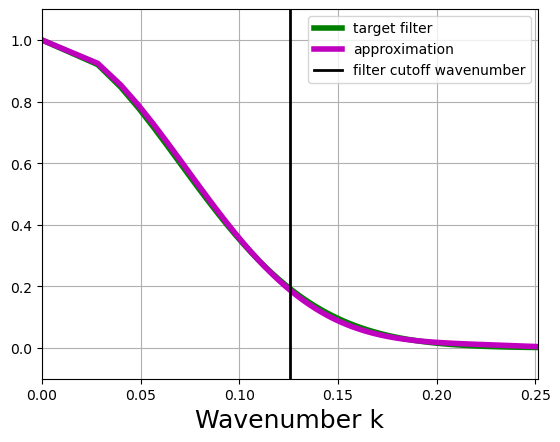

In [7]:
filter_cm26.plot_shape()

### Calculate frequency cutoff -- deep water waves

We can relate frequency and wavenumber for deep water waves as such: $(2\pi f)^2 = gk$, or $\omega^2=gk$, where $\omega=2\pi f$. Let's plot the power spectra against wavenumber. Let's also plot the cutoff wavenumber on this graph.

### Power spectra plotted against wavenumber

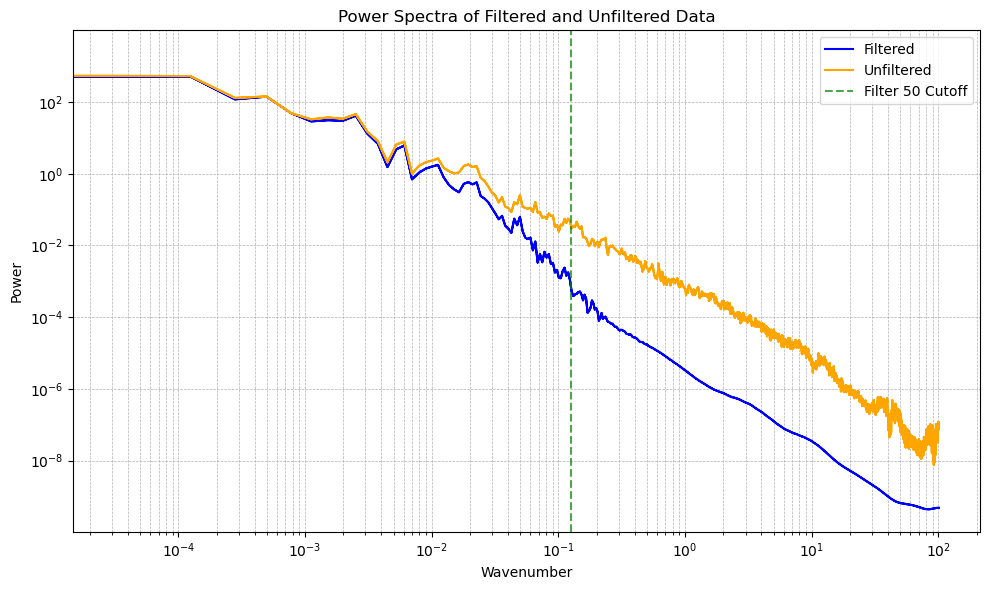

In [14]:
ds_in_snapshot = ds_in["u_relative"][0] #choose first time point
ds_out_50_snapshot = ds_out_50["u_relative"][0] #choose first time point

# Compute power spectrum for mean prediction and target
ps_unfiltered = xrft.power_spectrum(ds_in_snapshot, dim='xt_ocean', window=True).mean(dim='yt_ocean')
ps_filtered = xrft.power_spectrum(ds_out_50_snapshot, dim='xt_ocean', window=True).mean(dim='yt_ocean')

# Plot power spectra
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot((ps_filtered.freq_xt_ocean * 2 * np.pi) ** 2 / 9.81, ps_filtered, label='Filtered', color='blue')
ax.plot((ps_unfiltered.freq_xt_ocean * 2 * np.pi) ** 2 / 9.81, ps_unfiltered, label='Unfiltered', color='orange')

# Add filter cutoff line
ax.axvline(0.125, color='green', linestyle='--', alpha=0.7, label=f"Filter 50 Cutoff")

# Configure the plot
ax.set_title("Power Spectra of Filtered and Unfiltered Data")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Power')
ax.legend(loc='best')
ax.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()


Why is it that our power spectra for the filtered case does not drop off here? This could be because in Julius's code, the wet mask inputted into the filter creation function is a mask that accounts for NaN values across all variables. Thus, if a given point has a NaN for "slp", but not for "u_ocean", the wet mask will still force this point to be considered land when both variables are filtered. This could be what is causing our problem, especially since the filter creation does not take into account to data to which it will later be applied.